## **Logistic Regression**

We use the logistic function as a LINK between an unsconstrained output and a value between 0 and 1 (probability).

#### **Logistic Function**

In [2]:
## it is called logistic function or sigmoid function
## has two formulas
import numpy as np
from numpy import exp

## create formula # 1
def logistic(x):
  return exp(x) / (1 + exp(x))

## create formula # 2
def sigmoid(x):
  return 1 / (1 + exp(-x))

In [4]:
## x = 3.2 what is logistic(x)?
print(logistic(3.2))
print(sigmoid(3.2))

0.9608342772032357
0.9608342772032357


In [5]:
## x = -5 what is sigmoid(x)
print(sigmoid(-5))

0.0066928509242848554


In [6]:
## if x is large positive, then logistic(x) -> 1
## x = 10
logistic(10)

0.9999546021312976

In [7]:
## if x is large negative, then logistic(x) -> 0
## x = -10
logistic(-10)

4.5397868702434395e-05

## **Example**

In [9]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/default.csv')[['balance', 'default']]
df.head(20)

,balance,default
0,729.526495,0
1,817.180407,0
2,1073.549164,0
3,529.250605,0
4,785.655883,0
5,919.588530,0
6,825.513331,0
7,808.667504,0
8,1161.057854,0
9,0.000000,0


In [14]:
## check counts
## imbalanced
df['default'].value_counts()

,count
default,
0,9667
1,333


<Axes: xlabel='balance', ylabel='default'>

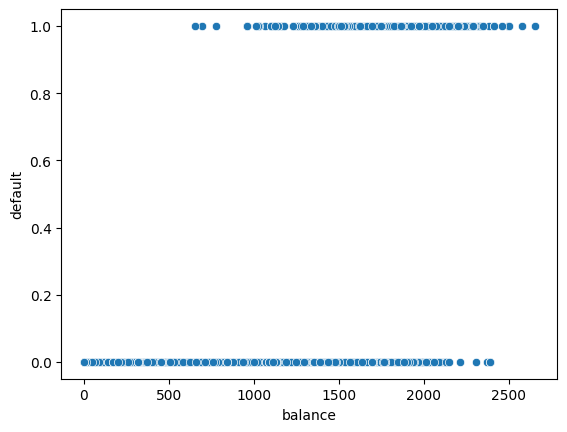

In [15]:
## scatter plot
import seaborn as sns
sns.scatterplot(data=df, x='balance', y='default')

In [16]:
## sklearn - predictive models (No goodness of fit metrics: p-values, F-test)
## statsmodels.api - descriptive models (includes p-values, hypothesis tests)

In [17]:
from re import X
## Create X and y
X = df[['balance']]
y = df['default']

In [19]:
## descriptive (p-values, hypothesis tests,....)
import statsmodels.api as sm

## instance
## include y and X
## sm.add_constant includes the column of 1s in the design (model) matrix
## fit right there
lr = sm.Logit(y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [21]:
## summary of the model
print(lr.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Nov 2024   Pseudo R-squ.:                  0.4534
Time:                        22:16:00   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006

Possibly complete quasi-separation: A fraction 0.13

In [ ]:
## model df - k (# predictors)
## params estimated: k + 1

In [24]:
## We have a customer with balance past due of $2000, what is the probability the customer defaults?
log_odds = -10.6513 + 0.0055*2000
print(f'This is the Log Odds of Default {log_odds} for a balance of $2000')

This is the Log Odds of Default 0.3486999999999991 for a balance of $2000


In [25]:
## what are the log (odds) of default for a customer with a balance $10000
log_odds = -10.6513 + 0.0055*10000
print(f'This is the Log Odds of Default {log_odds} for a balance of $10000')

This is the Log Odds of Default 44.3487 for a balance of $10000


In [26]:
## what are the log (odds) of default for a customer with a balance $500
log_odds = -10.6513 + 0.0055*500
print(f'This is the Log Odds of Default {log_odds} for a balance of $500')

This is the Log Odds of Default -7.901300000000001 for a balance of $500


In [28]:
## What is the probability of default for a person with past-due balance of $2000?
log_odds = -10.6513 + 0.0055*2000

phat = exp(log_odds) / (1 + exp(log_odds))
print(f'This is the Probability of Default {phat} for a balance of $2000')

This is the Probability of Default 0.5863022968465422 for a balance of $2000


In [29]:
## What is the prob(default) for a balance of 500?
log_odds = -10.6513 + 0.0055*500

phat = 1 / (1 + exp(-log_odds))
phat

0.00037012484387595435

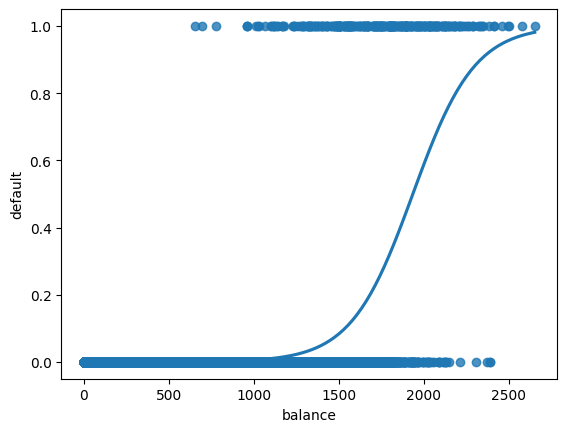

In [30]:
## plot the sigmoid function
sns.regplot(data=df, x='balance', y='default', logistic=True, ci = None);

In [31]:
## What is the prob(default) for a balance of 2500?
log_odds = -10.6513 + 0.0055*2500

phat = 1 / (1 + exp(-log_odds))
phat

0.956839089471801

In [32]:
## Odds
## Odds default = p(default) / p(Non-default)
## Odds Ratio = 22
## interpret as: There is a 22 to 1 odds in favor of default
## interpret as: The probability of default is 22 larger than the probability of non-default

In [33]:
## What are the odds of default for someone with a balance $2500

## 1) logodds
log_odds = -10.6513 + 0.0055*2500

## 2) prob
prob = 1 / (1 + exp(-log_odds))

## 3) odds
odds = prob / (1 - prob)
odds

22.169112693919036

In [35]:
## you can get the odds from the log(odds)
odds = exp(log_odds)
odds

22.169112693919065